# Unravelling the Social Web: A Network Analysis of Jeffrey Epstein's Sphere







In [ ]:
pip install powerlaw

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import powerlaw
import statistics as st

## **Upload Graph**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive/'

In [ ]:
G = nx.read_graphml(path + 'ae_network.graphml')
node_name = nx.get_node_attributes(G, "name")

## **Preliminary Steps**



### Remove isolated nodes

When approeaching the calculation of the degree of distrubtion, it was clear to us that there were some isolated nodes in the graph that escaped the data cleaning phase, according to which all passengers travelling alone were going to be excluded from the analysis. Therefore, the isolated nodes have been removed from the graph before performing all the analysis below.

In [ ]:
#If a node has a degree of 0, it means that there are no edges connected to it
degree_distribution = dict(nx.degree(G))

# Determine the minimum and maximum degree in the graph
min_degree = min(degree_distribution.values())

# Count the occurrences of the minimum degree
min_degree_count = list(degree_distribution.values()).count(min_degree)

print("Minimum degree:", min_degree)
print("Number of occurrences:", min_degree_count)

Minimum degree: 0
Number of occurrences: 274


After cross checking with the original database whether the nodes were actually isolated, they were removed from the graph G.

In [ ]:
isolated_nodes = list(nx.isolates(G))
print(isolated_nodes)

['0', '3', '4', '6', '7', '9', '10', '12', '15', '18', '20', '23', '24', '28', '29', '30', '31', '32', '33', '36', '37', '38', '39', '40', '41', '43', '44', '45', '46', '48', '49', '50', '53', '54', '57', '60', '61', '64', '65', '67', '69', '70', '71', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '92', '93', '94', '95', '96', '99', '100', '102', '103', '105', '107', '108', '109', '110', '111', '112', '115', '116', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '133', '135', '136', '138', '139', '140', '141', '142', '144', '145', '146', '148', '149', '150', '152', '153', '155', '157', '158', '160', '161', '162', '163', '164', '165', '168', '169', '172', '175', '176', '177', '179', '180', '182', '183', '184', '189', '190', '191', '194', '195', '196', '197', '198', '200', '201', '202', '203', '204', '205', '206', '208', '210', '212', '214', '215', '216', '217', '218', '219', '220', '221', '225', '226',

In [ ]:
G.remove_nodes_from(isolated_nodes)

## **Centrality Measures**

### Degree Centrality



In our analysis, we focused on several centrality measurements to gain insights into the significance and influence of individuals within Epstein's network. For this study, the degree centrality serves as a vital indicator of an individual's prominence and influence within Jeffrey Epstein's network and therefore it has been applied to all of our graphs/networks. A node with a high degree centrality indicates a greater number of direct connections, suggesting a central role in the network's structure and dynamics.

In [ ]:
degree_centrality = nx.degree_centrality(G)
dc_data = pd.DataFrame({"Id": list(degree_centrality.keys()),
                        "Name": [node_name[node] for node in degree_centrality.keys()],
                        "DegreeCentrality": list(degree_centrality.values())
                        }).sort_values(by="DegreeCentrality", ascending=False).reset_index(drop=True)

dc_data.head(10)

,Id,Name,DegreeCentrality
0,211,Kenneth Gilman,0.04878
1,47,Bruce Soll,0.04878
2,188,Jerry Merritt,0.04878
3,186,Jerry Beck,0.04878
4,232,Les Wexner,0.04878
5,171,James S. (Jim) Forsbach,0.04878
6,342,Samuel Fried,0.04878
7,192,Jimmy Cayne,0.03252
8,166,Ira Zicherman,0.03252
9,1,Alan (Ace) Greenberg,0.03252


For the Associated Entities network, the highest degree centrality with a centrality score of 0.04878 belongs to “Kenneth Gilman” along with the other six individuals who share the associated entity “The Limited, Inc.”.
Even though we see that “JE” and “GM” seem highly important in the Flights graph, in the Cities and Associated Entities graphs they do not share the same importance. Since “JE” has “Little St. James” for location in the Cities graph, he is not included in the biggest clique of that graph and not included in the Associated Entities graph as well.


### Eigenvector Centrality



Eigenvector centrality measures the importance of a node in a network by considering both the network topology and the weights of its connections. It reflects not only the number of connections but also the quality of those connections, emphasising nodes that are connected to other influential nodes.

In [ ]:
weighted_eigenvector_centrality = nx.eigenvector_centrality(G)

wec_data = pd.DataFrame({"Id": list(weighted_eigenvector_centrality.keys()),
                        "Name": [node_name[node] for node in weighted_eigenvector_centrality.keys()],
                        "WeightedEigenvectorCentrality": list(weighted_eigenvector_centrality.values())
                        }).sort_values(by="WeightedEigenvectorCentrality", ascending=False).reset_index(drop=True)

wec_data.head(10)

Since the Associated Entities network consists of many cliques, eigenvector centrality assigns equal centrality scores for nodes that belong to the same clique. This is because every node is reachable from every other node via direct paths of the same length and it reflects the equal importance of all nodes in facilitating connections within a clique. For example, we see every individual from “The Limited, Inc.” along with “Kenneth Gilman” on top of the table with an eigenvector centrality score of 0.377964 in the Associated Entities network.


### Closeness Centrality

Closeness centrality measures how close a node is to all other nodes in the network, quantifying its ability to efficiently communicate and disseminate information. It considers not only the number of connections but also the length of the shortest paths to reach other nodes in the network.

In [ ]:
weighted_closeness_centrality = nx.closeness_centrality(G, distance="weight")

wcc_data = pd.DataFrame({"Id": list(weighted_closeness_centrality.keys()),
                        "Name": [node_name[node] for node in weighted_closeness_centrality.keys()],
                        "WeightedClosenessCentrality": list(weighted_closeness_centrality.values())
                        }).sort_values(by="WeightedClosenessCentrality", ascending=False).reset_index(drop=True)

wcc_data.head(10)

,Id,Name,WeightedClosenessCentrality
0,211,Kenneth Gilman,0.04878
1,47,Bruce Soll,0.04878
2,188,Jerry Merritt,0.04878
3,186,Jerry Beck,0.04878
4,232,Les Wexner,0.04878
5,171,James S. (Jim) Forsbach,0.04878
6,342,Samuel Fried,0.04878
7,192,Jimmy Cayne,0.03252
8,166,Ira Zicherman,0.03252
9,1,Alan (Ace) Greenberg,0.03252


In the context of the Associated Entities networks, where cliques are prevalent, closeness centrality also yields equal scores for nodes within the same clique, as the eigenvector centrality. Therefore, individuals within a clique demonstrate identical closeness centrality scores, reflecting their equivalent importance in facilitating efficient communication and information flow within the group.


### Betweenness Centrality

Betweenness centrality is a key measure that assesses the extent to which a node serves as a bridge or intermediary between other nodes in the network. Nodes with high betweenness centrality play a critical role in maintaining connectivity and facilitating communication within the network.

This measure investigates the extent to which a
node lies on paths between other nodes. Since this network is perfectly transitive, the betweenness centrality is 0.

In [ ]:
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight="weight")

wbc_data = pd.DataFrame({"Id": list(weighted_betweenness_centrality.keys()),
                        "Name": [node_name[node] for node in weighted_betweenness_centrality.keys()],
                        "WeightedBetweennessCentrality": list(weighted_betweenness_centrality.values())
                        }).sort_values(by="WeightedBetweennessCentrality", ascending=False).reset_index(drop=True)

wbc_data.head(10)

In our Cities and Associated Entities networks which consist of disconnected subgraphs, every node is directly connected to every other node within every subgraph, leaving no room for intermediary positions along paths. Since betweenness centrality

measures a node's role as an intermediary on shortest paths, it becomes irrelevant in such networks, resulting in a value of 0 for all nodes. Hence it is not applicable.

## **Groups of Nodes Analysis**

### K-core



K-core decomposition is a method used to identify core nodes within a network based on their connectivity. Nodes that lie within the highest-k cores are considered "core" nodes, while those outside these cores are "peripheral" to the network.

In [ ]:
core_number = nx.core_number(G)
k_data = pd.DataFrame({"Id": list(core_number.keys()),
                     "Name": [node_name[node] for node in core_number.keys()],
                     "KCore": list(core_number.values())
                      }).sort_values(by="KCore", ascending=False).reset_index(drop=True)

k_data


,Id,Name,KCore
0,211,Kenneth Gilman,6
1,47,Bruce Soll,6
2,188,Jerry Merritt,6
3,186,Jerry Beck,6
4,232,Les Wexner,6
...,...,...,...
119,106,Early Mack,1
120,104,Dr. Henry Jarecki,1
121,98,Donald Marron,1
122,91,Debbie Stewart,1


For the Cities and Associated Entities Network, we see many individuals ending up having the same value, where every member of a clique forms k-cores, where k is equal to the size of the clique minus 1. This is because, in a clique of size n, each node has n-1 connections to other nodes within the clique.

### Clustering






Clustering coefficients measure the tendency of nodes in a network to form clusters or groups, considering both the presence of triangles and the strengths of connections. In our analysis, we calculated the local clustering coefficient for individual nodes and the average clustering coefficient for the entire network. The clustering coefficient C:

$\hspace{6cm}$ $C(d)=\frac{T_n(d)}{N_n(d) {d \choose 2}} $ $\hspace{3cm}$ (1)

where T(d) is the number of triangles and N(d) is the number of vertices of degree d in G (i.e., the number of edges between the neighbors of the vertices of degree d)5. It's calculated by counting the number of triangles that a node is a part of and normalising it by the maximum possible number of triangles for that node.

In [ ]:
clustering = nx.clustering(G, weight="weight")

clustering_data = pd.DataFrame({"Id": list(clustering.keys()),
                        "Name": [node_name[node] for node in clustering.keys()],
                        "Clustering": list(clustering.values())
                        }).sort_values(by="Clustering", ascending=False).reset_index(drop=True)

clustering_data



,Id,Name,Clustering
0,1,Alan (Ace) Greenberg,1.0
1,47,Bruce Soll,1.0
2,192,Jimmy Cayne,1.0
3,188,Jerry Merritt,1.0
4,186,Jerry Beck,1.0
...,...,...,...
119,106,Early Mack,0.0
120,104,Dr. Henry Jarecki,0.0
121,98,Donald Marron,0.0
122,91,Debbie Stewart,0.0


Using Equation (1), we can conclude that in Cities and Associated Entities networks, the local clustering coefficient for each node within the clique should be 1, indicating that every node forms a connection with every other pair of nodes it's connected to for every clique. Since each clique behaves like this, and there are no interconnections between the cliques, the clustering coefficient for the entire network would remain high. This is because within each clique, clustering is maximal, and there are no additional connections to dilute the clustering.

### Average Clustering Coefficient



The average clustering coefficient measure is used to calculate the degree of clustering around individual nodes, averaged over all nodes in the graph. It is calculated as:

$\hspace{6cm}$$C=\frac{1}{n}\sum_{i=1}^nC_i$$\hspace{4cm}$(2)

where n is the total number of nodes in the network and 𝐶𝑖 is the clustering coefficient for node 𝑖. The average clustering coefficient being close to 1 suggests that the network
exhibits a high level of clustering or transitivity.

In [ ]:
average_clustering = nx.average_clustering(G)
average_clustering

0.14516129032258066

We can conclude that nodes within the network tend to form groups or clusters where connections are dense, and nodes are highly interconnected.

### Compactness


Compactness in a network refers to the efficiency of information flow, indicating how closely connected nodes are to each other by taking into consideration the weights of the edges connecting them.

In [ ]:
# Creation of a subgraph excluding the specified nodes
subgraph_nodes = [node for node in G.nodes()]
subgraph = G.subgraph(subgraph_nodes)

In [ ]:
def calc_compactness(graph):
    shortest_path_lengths = dict(nx.all_pairs_dijkstra_path_length(graph, weight='weight'))

    total_compactness = 0
    total_pairs = 0

    for source, lengths in shortest_path_lengths.items():
        for target, distance in lengths.items():
            if source != target:
                total_compactness += 1 / distance
                total_pairs += 1

    if total_pairs == 0:
        return 0

    return total_compactness / total_pairs

compactness_all = calc_compactness(G)
print("Compactness of the network : ", compactness_all)


Compactness of the network :  1.0


The compactness measurement result of 1.0 for both the Cities and Associated Entities networks indicates a remarkable level of cohesion within these networks. A compactness score of 1.0 suggests that every node within these networks is interconnected. This phenomenon reflects a tightly knit structure where individuals are densely connected, typically indicative of strong relationships or affiliations.

### Transitivity

To measure the likelihood that two nodes connected to the same node are also connected to each other, we used the transitivity measure. It gives the ratio of closed triangles to all possible triangles in the graph, providing insight into the global clustering structure of the graph.

In [ ]:
transitivity = nx.transitivity(G)
print("Transitivity: ", transitivity)

Transitivity:  1.0


For Cities and Associated Entity network analysis, the network is composed entirely of transitive cliques, and there are no connections between nodes in different cliques, so the entire network also has a transitivity value of 1.0. This means that every possible triad of nodes in the network forms a closed triangle, and essentially, the network exhibits maximal transitivity, reflecting the tight-knit relationships and interconnectedness among individuals within each clique.

## **Other measurements**

### Small Worldness



The concept of small-worldness in network theory refers to the phenomenon where most nodes in a network can be reached from every other node by a small number of steps. In the context of Jeffrey Epstein's network analysis, small-worldness provides insights into the network's structure and the ease of information flow and communication among individuals.

The σ and ω coefficients, which were calculated to determine the likelihood that our networks exhibit small-worldness properties, are given as:

$\hspace{6cm}$$σ=\frac{\frac{C}{C_r}}{\frac{L}{L_r}}$ ,$\hspace{4cm}$(3)<br>

$\hspace{6cm}$$ω=\frac{L}{L_r}-\frac{C}{C_l}$$\hspace{3cm}$(4)

where C and L represent, respectively, the average clustering coefficient and the average shortest path length; Lr represents the average shortest path length of an equivalent random graph, Cr represents the average clustering coefficient of an equivalent random graph, and Cl represents the average clustering coefficient of an equivalent lattice graph.

Equation (3) and Equation (4) show that the sigma coefficient (σ) reflects the balance between clustering and average path lengths in the network whereas the omega coefficient (ω) compares the clustering coefficient and average shortest path length of the actual network to those of random and regular lattice networks. The Omega value ranges from -1 to 1, with a positive value indicating a network more like a random graph, and a negative value indicating a network more like a lattice graph, whereas values close to 0 mean that G has small-world characteristics8. The sigma coefficient of a small-world network typically is significantly greater than 1, indicating that it has a higher clustering coefficient and a similar or only slightly longer average path length compared to a random network.

The small-worldness analysis is not applied to Cities and Associated networks, because they essentially are a collection of disconnected subgraphs, each subgraph being a perfectly transitive clique. As a result, the average shortest path length between any pair of nodes in different cliques would be infinite. The clustering coefficients within each clique are high since each node is connected to every other node within the clique. However, this clustering doesn't extend beyond the boundaries of the clique.

Therefore, while each clique individually might have characteristics of a small-world network (high clustering coefficient, short average path length within the clique), we cannot conclude that the whole network exhibits small-world properties.



### Degree of distribution



Scale-free networks, as a characteristic of many real-world networks, exhibit a hierarchical structure where a few highly connected nodes, referred to as hubs, coexist with numerous nodes having only a few connections. This results in a degree distribution that follows a power-law distribution, contrasting with the more evenly distributed degree distribution observed in random networks.

To assess whether the nodes' degrees in Epstein's networks follow a power-law distribution, we compute the Scaling Coefficient (α) as follows:

$\hspace{6cm}$$α=1+n(\sum_{i=1}^nln\frac{d}{d_{min}-\frac{1}{2}})^{-1}$$\hspace{4cm}$(5)

In Equation (5), n is the number of nodes in our network, 𝑑𝑖 is the degree of the node
i, and 𝑑𝑚𝑖𝑛 is the minimum degree in the graph. The Scaling Coefficient (α) quantifies the
degree to which the degree distribution follows a power-law distribution. In power-law distributions, we observe the condition 2 ≤ α ≤ 3.

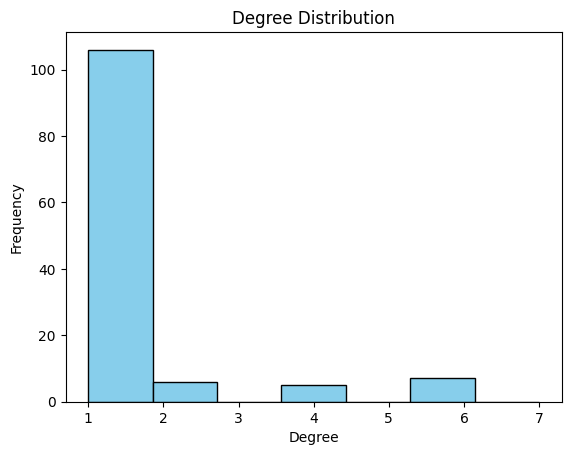

In [ ]:
degree_distribution = dict(nx.degree(G))

max_degree = max(degree_distribution.values())
min_degree = min(degree_distribution.values())

plt.hist(degree_distribution.values(), bins=max_degree+1, range=(min_degree, max_degree+1), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [ ]:
degree_distribution_list = [G.degree(node) for node in G]

shifted_degree_distribution_list = [degree for degree in degree_distribution_list]

shifted_degree_distribution_list = [max(0, degree) for degree in shifted_degree_distribution_list]

n = len(shifted_degree_distribution_list)
sum_val = sum(np.log(degree) for degree in shifted_degree_distribution_list)

alpha = 1 + n * (sum_val ** -1)
print("Alpha =", alpha)

Alpha = 6.246973526156179


A higher alpha value, the one we observed for the Associated Entities network, signifies a heavy-tailed distribution, indicating the presence of outliers with significantly higher degrees compared to the majority of nodes. This phenomenon is largely influenced by the abundance of outliers with only one edge in our network, which skews the distribution.